**WordCloud**

In [51]:
#import libraries
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
# Download NLTK punkt
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\I346462\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
# Now let's Read the survey data
survey_data = pd.read_csv('survey_data.csv')

In [54]:
# Comments column
responses = survey_data['comments'].tolist()

In [55]:
# generating ngrams
def generate_ngrams(text, n):

  tokens = word_tokenize(text)
  ngrams = [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]
  return ngrams

In [56]:
# CountVectorizer
vectorizer = CountVectorizer(analyzer=lambda text: generate_ngrams(text, 2) + generate_ngrams(text, 3))

In [57]:
# Fitting the vectorizer
vectorizer.fit_transform(responses)

<197x61 sparse matrix of type '<class 'numpy.int64'>'
	with 239 stored elements in Compressed Sparse Row format>

In [58]:
# Getting feature names
feature_names = vectorizer.get_feature_names_out()

In [59]:
# Create a list of stop words
stop_words = ['and', 'are', 'be', 'of', 'in', 'the', 'to', 'use','why','what','whats','as','it','on','new','by','need','mor','they','liek','like','no','not','only','lot','for']

In [60]:
# Printing the first 20 feature names
print("Example Feature Names (including bigrams and trigrams):")
print(feature_names[:20])

Example Feature Names (including bigrams and trigrams):
[(',', 'the') (',', 'the', 'government') ('Build', 'sustainable')
 ('Build', 'sustainable', 'houses') ('Building', 'should')
 ('Building', 'should', 'be') ('Information', 'sessions')
 ('Informationto', 'be') ('Informationto', 'be', 'made')
 ('More', 'grants') ('More', 'grants', 'for') ('The', 'Informationto')
 ('The', 'Informationto', 'be') ('be', 'isolated')
 ('be', 'isolated', 'to') ('be', 'made') ('be', 'made', 'public')
 ('conferences', 'to') ('conferences', 'to', 'inform')
 ('efficients', 'equipments')]


In [61]:
#import libraries sklearn countvectorizer matplotlib
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [62]:
# Creating the CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

In [63]:
# Fitting and transforming the data
data_vectorized = vectorizer.fit_transform(survey_data['comments'])

In [64]:
# Summing up the counts of each vocabulary word
dist = np.sum(data_vectorized.toarray(), axis=0)

30 build
1 building
1 conferences
6 efficients
6 energy
6 equipments
86 finance
1 government
26 grants
1 heating
6 households
30 houses
1 inform
7 information
1 informationto
1 isolated
1 organise
46 politics
1 population
1 public
1 reduce
7 sessions
30 sustainable
6 upgrade


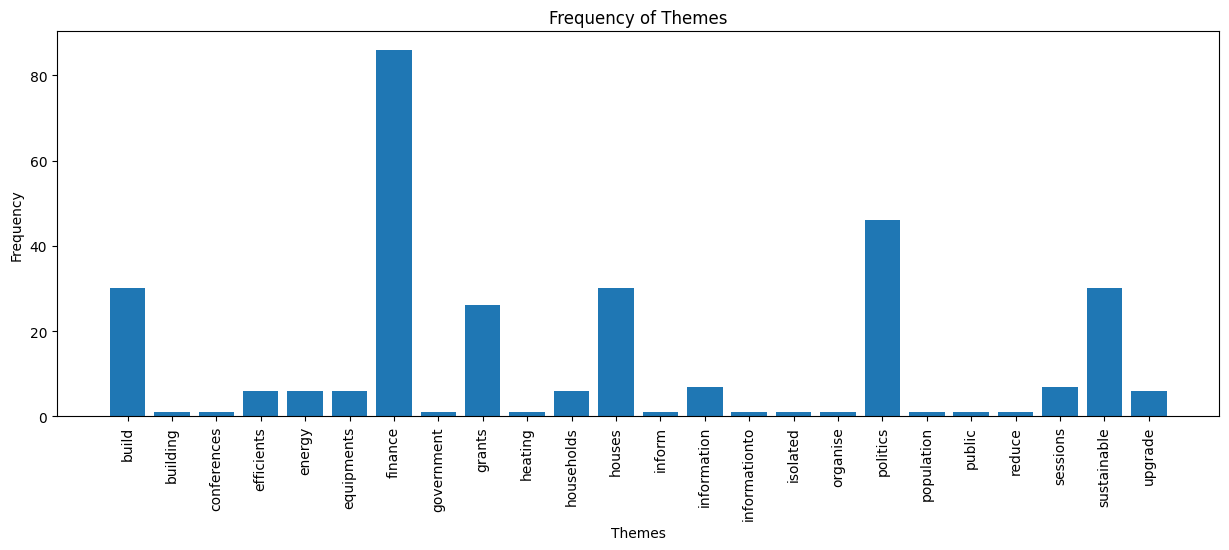

In [65]:
# For each, print the vocabulary word and the number of times it appears in the data set
for tag, count in zip(vectorizer.get_feature_names_out(), dist):
    print(count, tag)

# Plotting
plt.figure(figsize=(15, 5))
plt.bar(vectorizer.get_feature_names_out(), dist)
plt.title('Frequency of Themes')
plt.xlabel('Themes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**Create Word cloud**

In [66]:
#printting columns
survey_data.columns

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring', 'checking_consumption',
       'appliances_using_the_most_electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')

In [67]:
#import libraries wordcloud matplotlib pandas
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv('survey_data.csv')

# Joinning processed comments together.
long_string = ','.join(list(df['comments'].values))

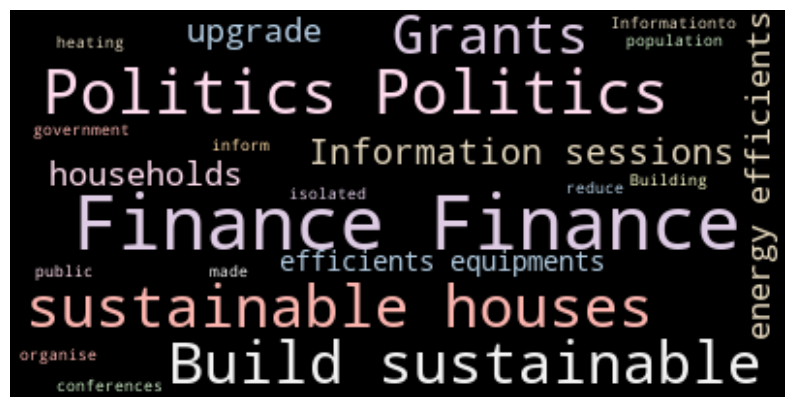

In [68]:
# Creating a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_color='white', colormap='Pastel1')

# Generating a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud provide visual representation of text data only, for more indepth analysis let's us use Sentiment Analysis.

**Sentiment Analysis**

In [69]:
#import library textblob pandas
import pandas as pd
from textblob import TextBlob

In [70]:
# Load the data
survey_data = pd.read_csv('survey_data.csv')

 There is a  need to define a function that will calculate sentiment. TextBlob conveniently has a .sentiment property which returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [71]:
#define a function
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the polarity of the text
    return blob.sentiment.polarity

apply the above function to the 'comments' column of the DataFrame

In [72]:
# applying the fucntion t othe comments
survey_data['sentiment'] = survey_data['comments'].apply(get_sentiment)

calculate the average sentiment

In [73]:
# Calculating the average sentiment
average_sentiment = survey_data['sentiment'].mean()
print(f'The average sentiment is: {average_sentiment}')

The average sentiment is: 0.015228426395939087
